# Introduction to Software Repostitories
### Bryan Scott, CIERA/Northwestern 
#### version 0.11, DSFP Session 21

We are going to walk through an example development workflow. This is based on Jake Vanderplas Sloan Great Wall example from the excellent astroml documentation and corresponding book: *Statistics, Data Mining, and Machine Learning in Astronomy: A Practical Python Guide for the Analysis of Survey Data*

### Part 0: Getting the data, and initializing the repository

In [1]:
# import statements

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# get the data by reading it from the supplied .npy file

X = np.load('SDSS_Great_Wall_data.npy')

Now we have some code and an idea of what the project we'll working on will be, so let's go ahead and create the repository and make our first commit. Normally commits will only be done after you've done a bit more work than some imports and a line of code to grad the data, but we're learning how to use git here!

Open a terminal and cd to the directory you're working on this notebook in. This should be a different directory from your cloned DSFP github repository. 

Now at the command line, type:

`git init`

`git add "working_notebook_name"`

`git commit -m "initial commit of the Great Wall project"`

Next we will make some changes to our notebook. We might, however, want to prevent git from tracking the data file I gave you. Open a text editor and create a file in your working directly called .gitignore, type two lines, 

`# do not track input or saved data files in this directory`

`*.npy `

`.ipynb_checkpoints`

Save and exit.

### Part 1: Git workflow

Let's begin by doing some exploratory data analysis with the Sloan great wall dataset. I would do the following here:

* check the dimensions of the data array - the units of the entries are Mpc. 
* make a scatter plot of the data and some histograms
* What are some simple statistics you might calculate? What are some more difficult ones?

Text(0, 0.5, 'Mpc')

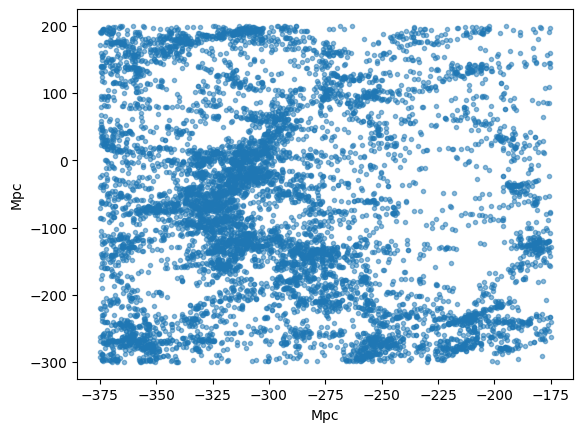

In [33]:
# exploratory data analysis goes here
# X.shape
x1=X[:,0]
x2=X[:,1]

plt.plot(x1,x2,'.',alpha=0.5)
plt.xlabel('Mpc')
plt.ylabel('Mpc')

Text(0, 0.5, 'Count')

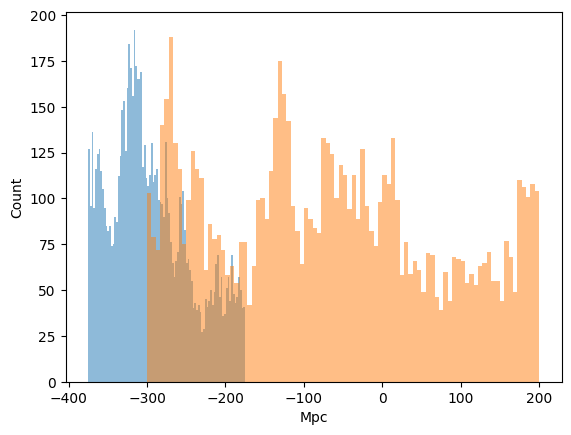

In [36]:
b1 = bins=int(np.ceil(np.sqrt(len(x1))))
b2 = bins=int(np.ceil(np.sqrt(len(x2))))

plt.hist(x1,alpha=0.5,bins=b1)
plt.hist(x2,alpha=0.5,bins=b2)
plt.xlabel('Mpc')
plt.ylabel('Count')


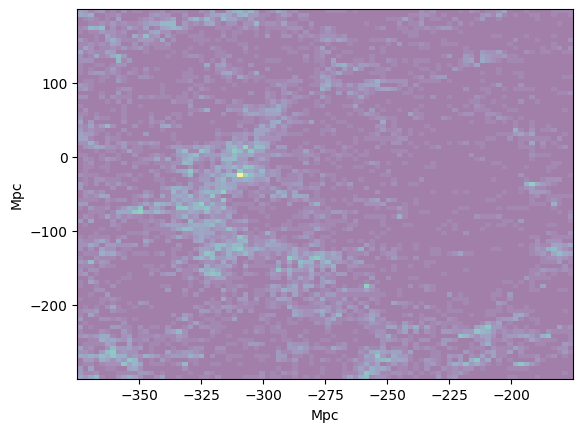

In [44]:
plt.hist2d(x1,x2,alpha=0.5,bins=b2)
plt.xlabel('Mpc')
plt.ylabel('Mpc')
plt.show()


Now that we've made some changes to this file by adding in our exploratory data analysis, let's look at what git tells us. 

* type `git status` to see if the file has been modified. 
* type `git diff` to see the differences between the previously staged version of the file and the current version
* now do `git add` `git commit -m "added exploratory data analysis"`

To create a snapshot of the project after our initial data analysis. We've just completed the simplest example of the github workflow. We create a repository, stage a file, take the snapshot, make some changes, examine differences, and repeat staging and snapshotting. Now we'll do some more interesting science with our dataset.  

### Part 2: Science with the Sloan Great Wall dataset and Github

The raw data that we're provided are positions of galaxies from the Sloan Digitial Sky Survey. This is a discrete sampling of bright sources that SDSS could detect, not the true underlying continuous matter distribution. While we can't measure that directly from the data provided, we can estimate the underlying distribution pattern. We'll begin by using Kernel Density Estimation. The following description of KDE (as a reminder) comes from the (as mentioned above) excellent book by Jake Vanderplas and others.

For a set of measurements ${x_i}$, the KDE at x is

$$\hat{f_{N}}(x) = \frac{1}{Nh^D} \sum_{i=1}^{N} K(\frac{d(x,x_i)}{h})$$

where D is the dimensions of the parameter space. The basic idea is to generalize a histogram to 1) more than 1 dimensional datasets and 2) to approximate each dataset by a function. Since our goal is to learn git, and you may already know about KDE, let's just use the off the shelf KDE implementation in sklearn. You'll need to pick a kernel ('gaussian' or 'tophat' work well) and choose a value for the bandwidth parameter. What are some tradeoffs in the estimate for the distribution patter when choosing a small or large bandwidth?

In [ ]:
from sklearn.neighbors import KernelDensity

In [ ]:
# KDE implementation goes here

Now that we've done some interesting science with our dataset, we might want to share that with the community and see if anyone has any interesting ideas for followup. 

* With your partner, pick one of your github account pages
* create a repository for this project
* link the local and remote repository: `Git remote add origin [link to your github repo]`
* `git push origin main`

Now things will get a bit more interesting...

### Part 3: Clustering, Collaborative Editing, branches, and merges

In this part, let's now implement a clustering algorithm to try and go beyond density estimation and towards identifying clusters in SDSS data. The Sloan Great Wall is easy to pick out by eye, but are there other clusters that we can identify? Can we find some natural separation between the Great Wall and the surrounding distribution?

Go to: https://scikit-learn.org/stable/modules/clustering.html 

and take a look at the different clustering methods. With your partner, pick two different clustering methods to try on the Great Wall dataset. Then,

* Start by going to the repository that you just created. Best practice for collaborative development is to document new features with issue tracking. So open an issue for each clustering method you'd like to pursue.
* Add in a clustering method of your choice below. Pull the remote main. Add in the clustering method of your choice.  
* When you're done, in your local repository, `git add`, `git commit`

In [ ]:
# clustering method goes here

### Part 4: Merges and Merge Conflicts

As we talked about, git is a distributed version control system. We now have three branches of the project. One on your computer, one on your partner's computer, and one on github. We now want to merge all of this together. We will do that in a few steps,

* First, have one partner commit their code to the github with: `git push origin main` - this should be their clustering method on the main branch. After the push, your remote repo should be up to date with this partner's main branch and clustering algorithm. 
* Hopefully this is a fast forward merge! If not, you'll either have to pull to bring your local branch up to date with the corresponding branch in the repo, or you'll have to do a 3-way merge. That's the point anyway, so git should give you a link to open a pull request. 
* If the previous merge worked as intended, have the other partner do `git push origin main` or `git push origin [name of branch to be merged]`. You will recieve a link to open a pull request. Open the pull request and complete it through the github GUI. 
* You should have merge conflicts. Manually fix any possible conflicts and click mark as resolved, and then merge pull request.

### Part 5: More Science to think about...

The Sloan Great Wall is interesting because it is one of the largest known 'structures' in the universe. As we know, there is no well posed and complete definition of a cluster, which makes it unclear what is meant by saying that some structure has some size. 

* How would you go about defining the size of the Great Wall? 
* How would you quantify the peculiarity of a structure of a given size? 
* What additional measurements would you need to quantify your answers?